In [1]:
# 분석용 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.shape

(39607, 71)

In [ ]:
train.columns

Index(['ID', 'X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08',
       'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17',
       'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26',
       'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35',
       'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44',
       'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53',
       'X_54', 'X_55', 'X_56', 'Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06',
       'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14'],
      dtype='object')

In [126]:
num_list = list(['X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35',
       'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44',
       'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50'])

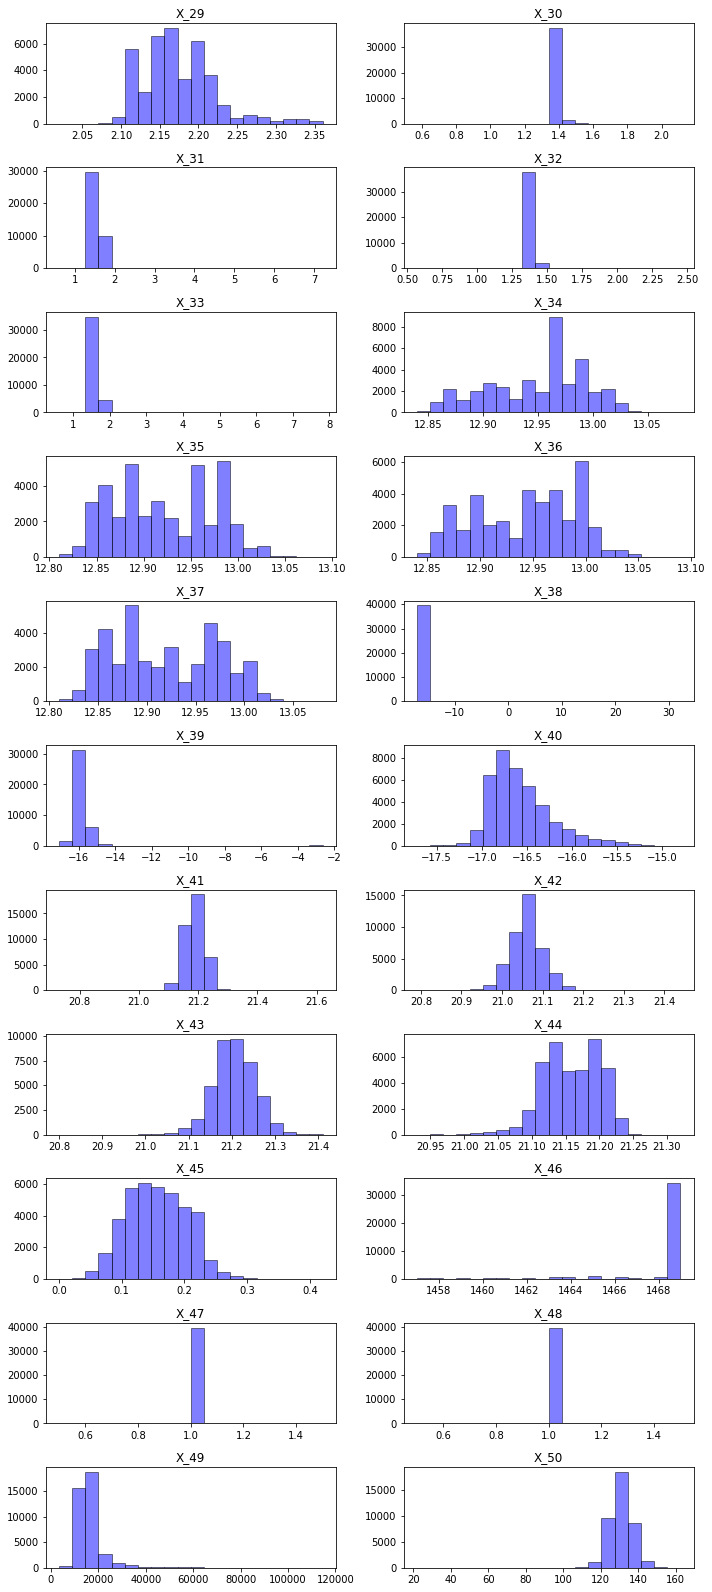

In [ ]:
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
  plt.subplot(15,2,i+1)
  plt.title(num_list[i])
  plt.hist(train[num_list[i]],color='blue',alpha=0.5,bins=20,edgecolor='black')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


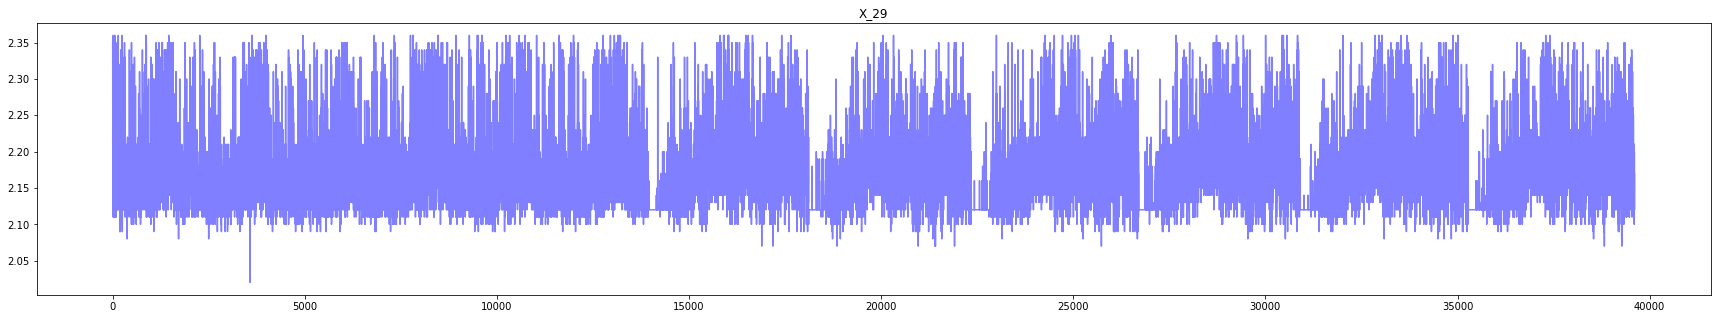

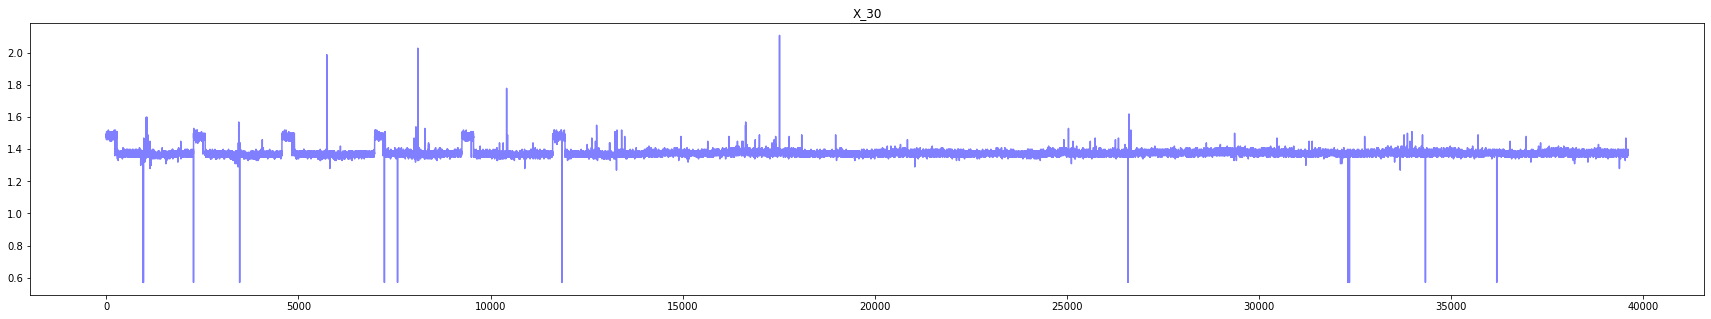

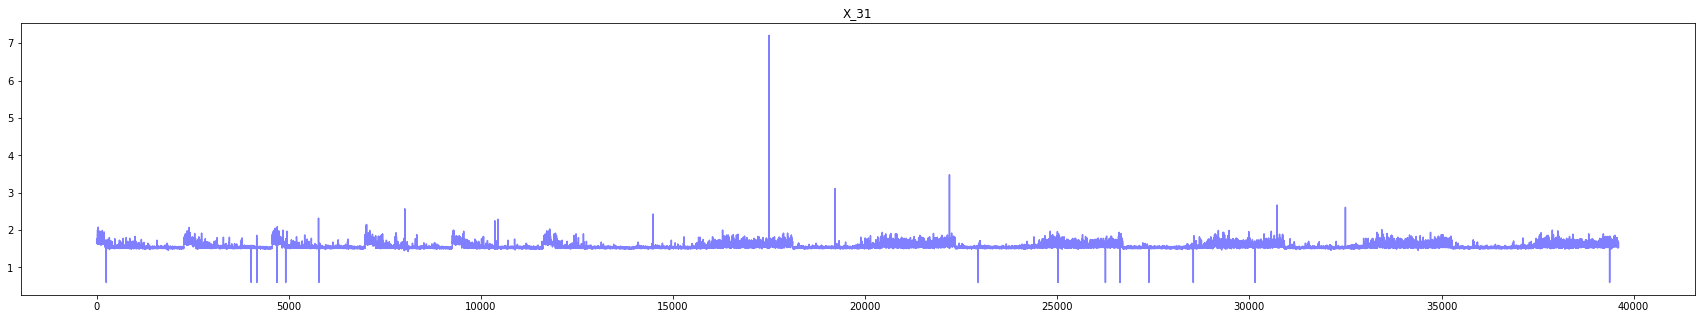

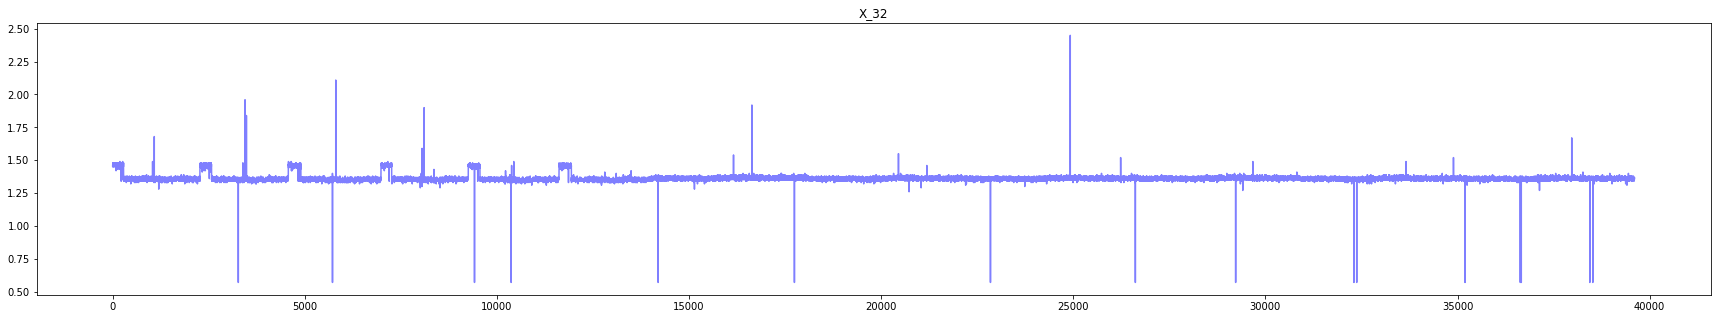

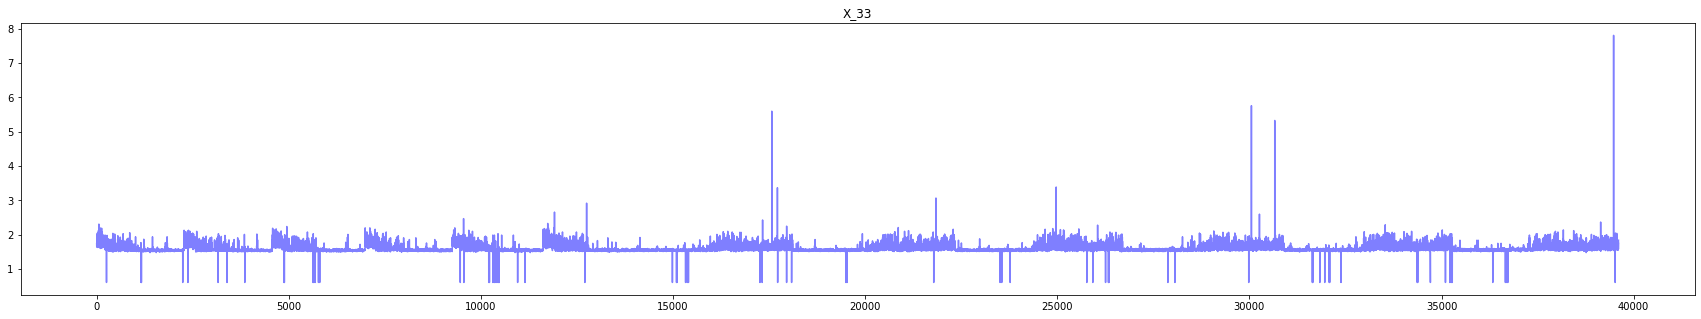

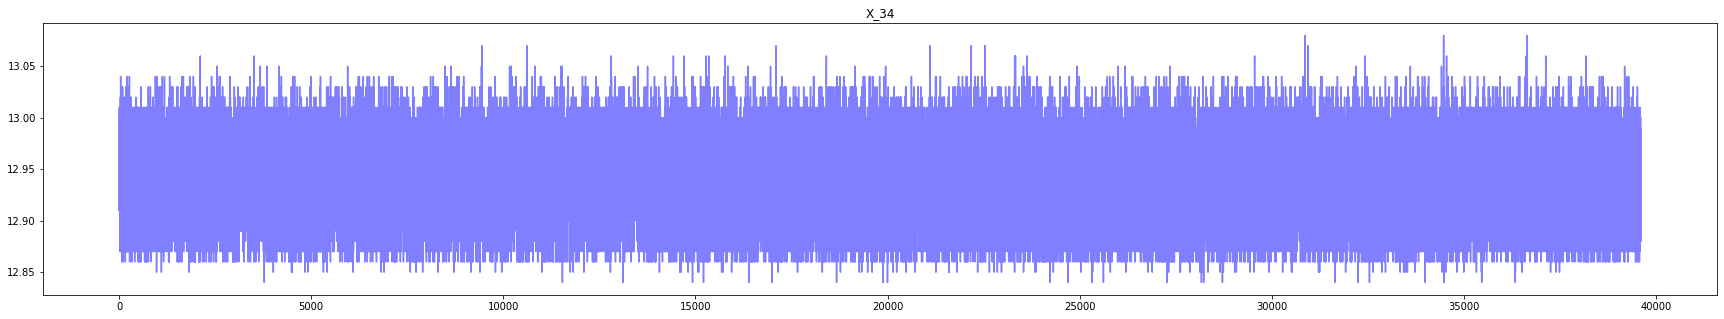

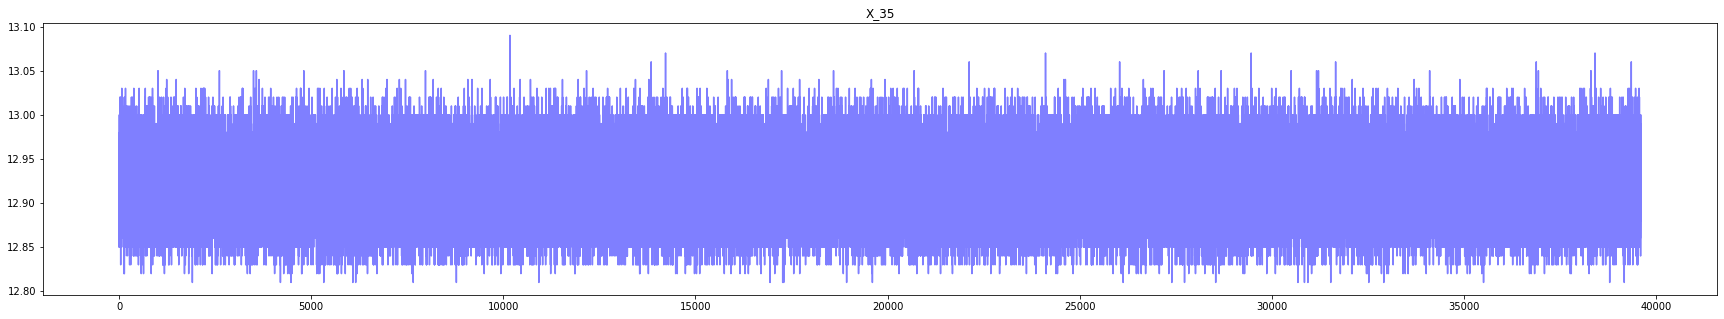

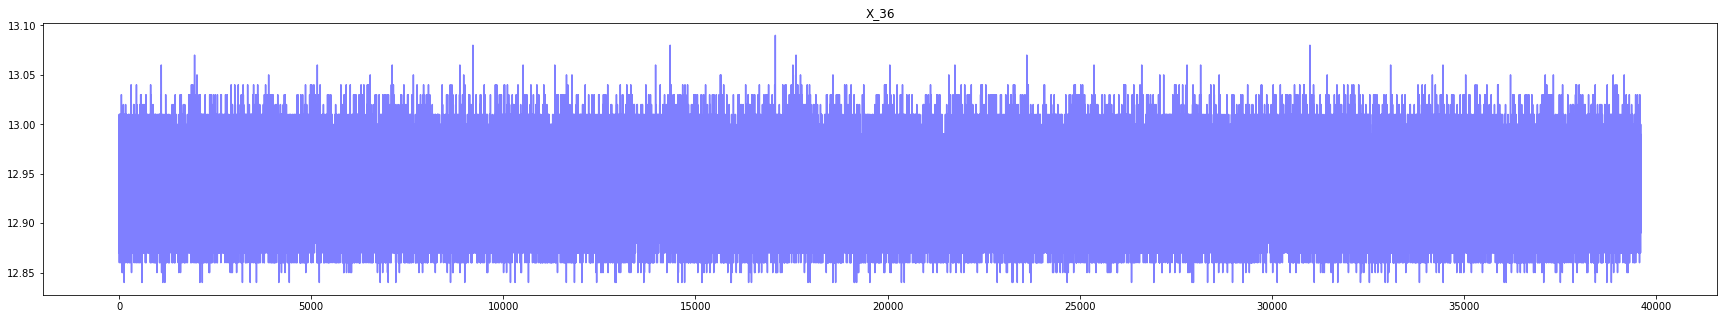

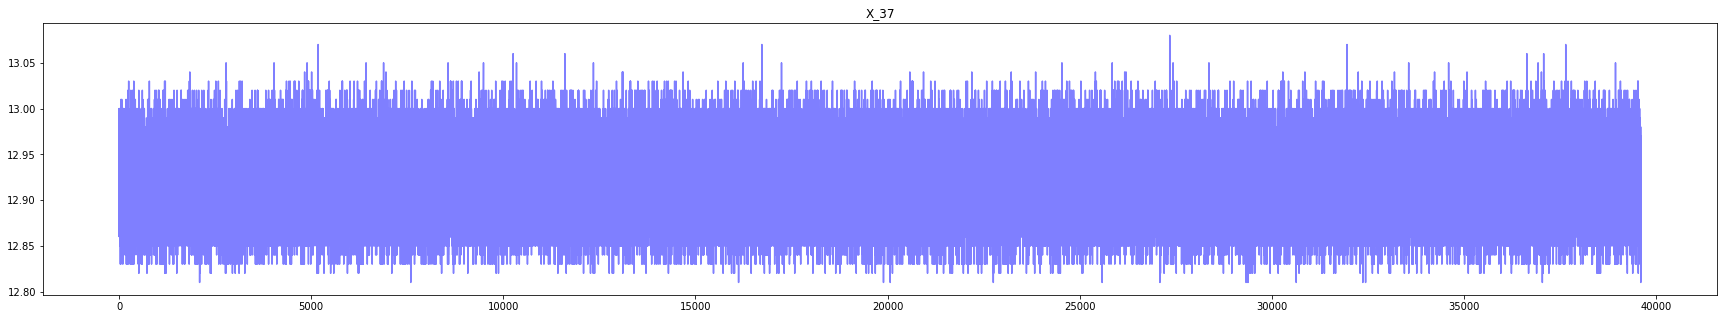

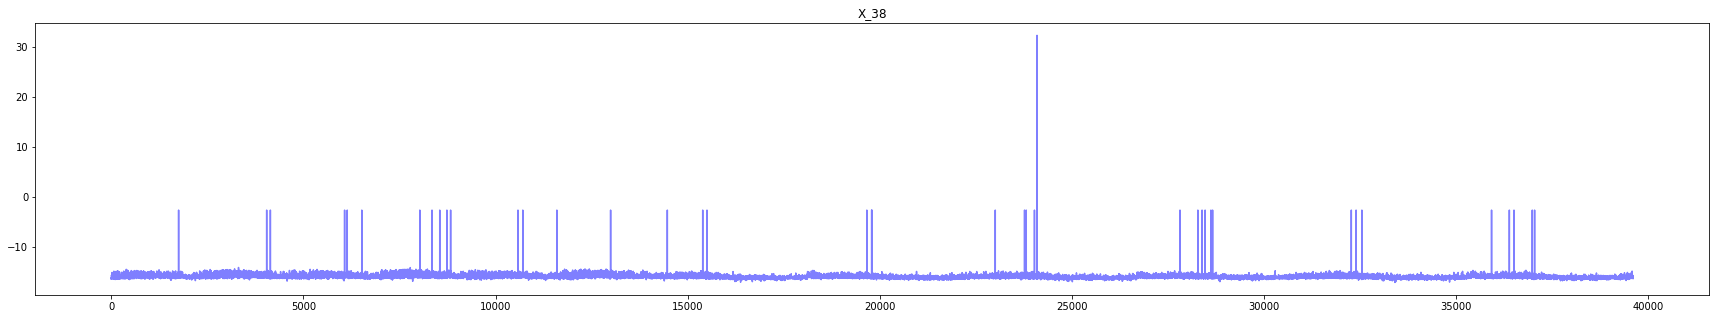

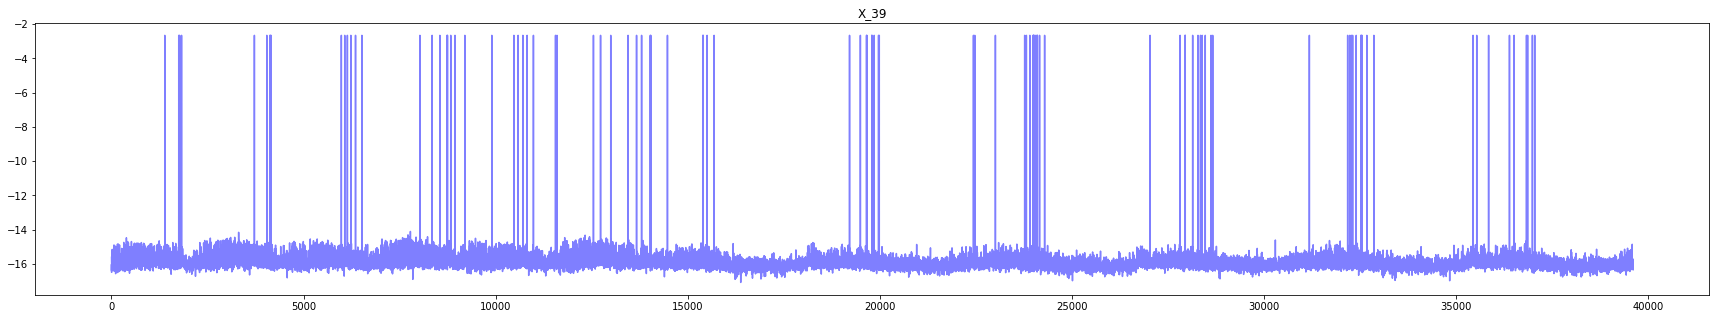

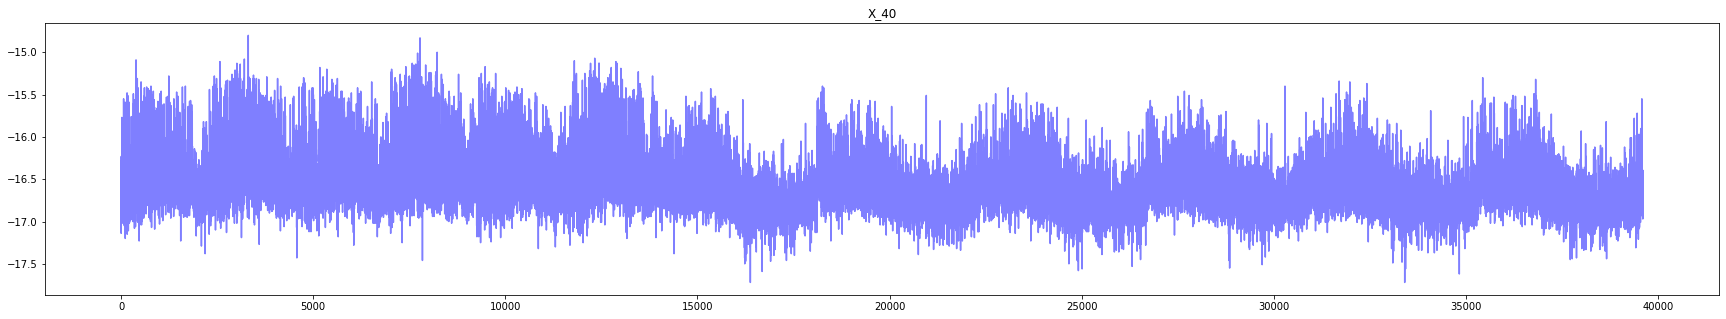

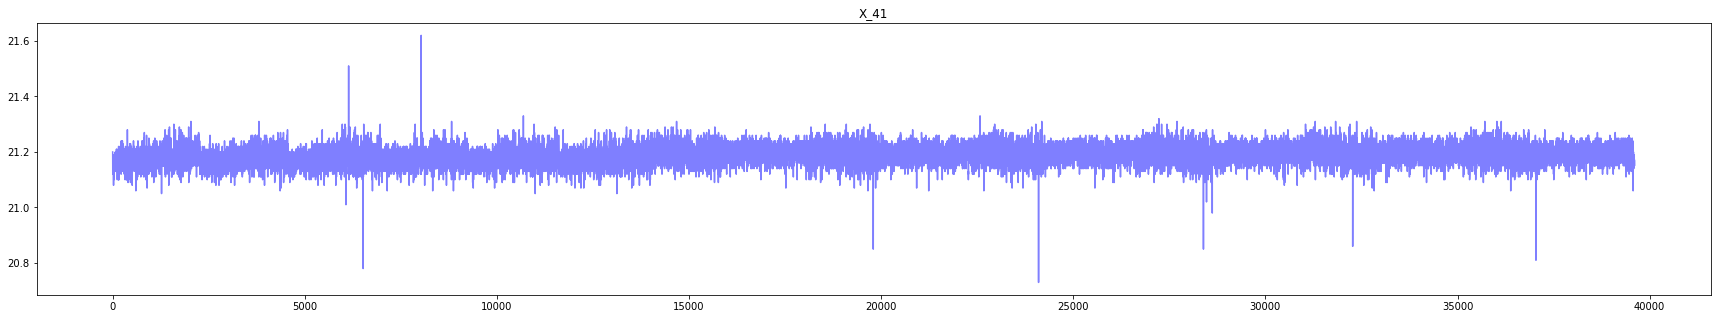

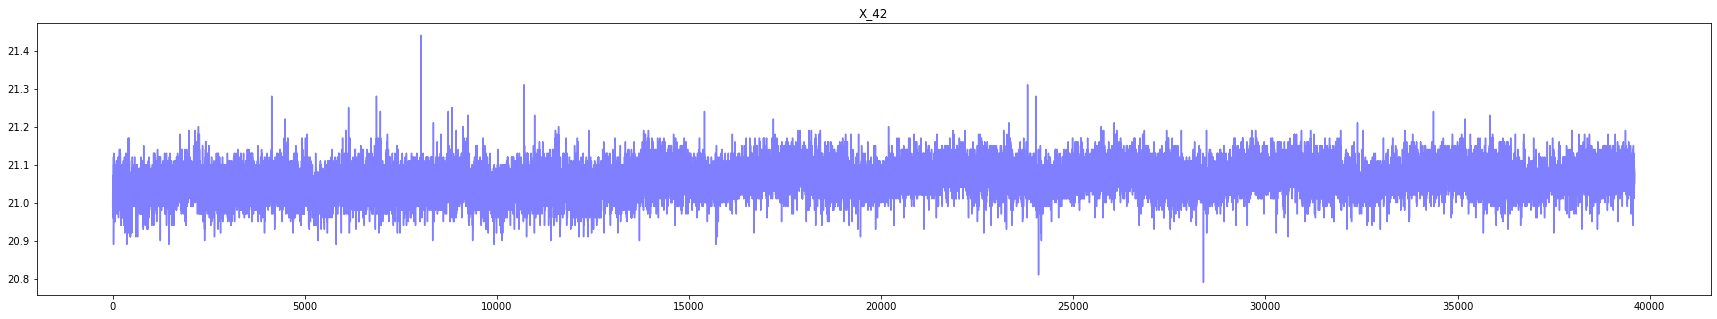

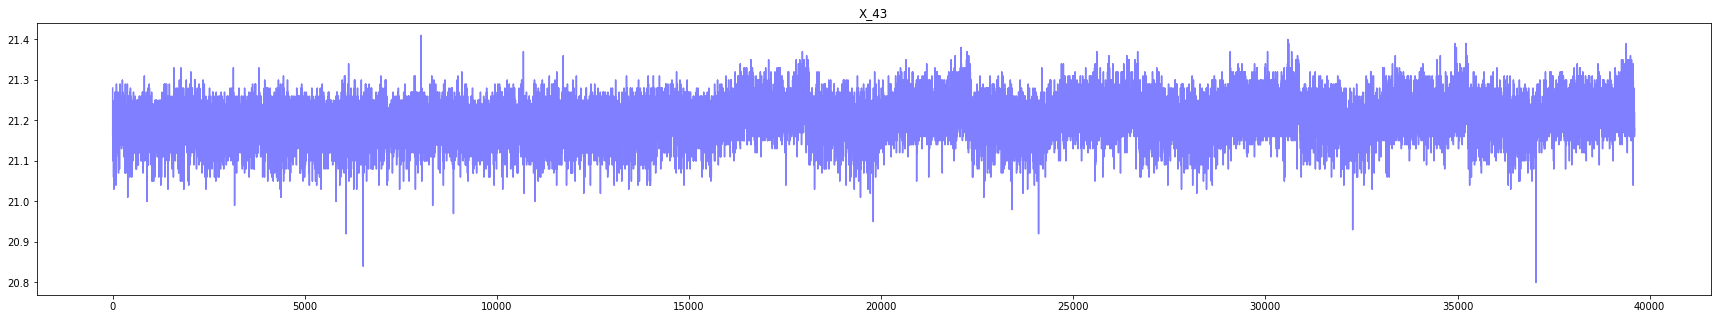

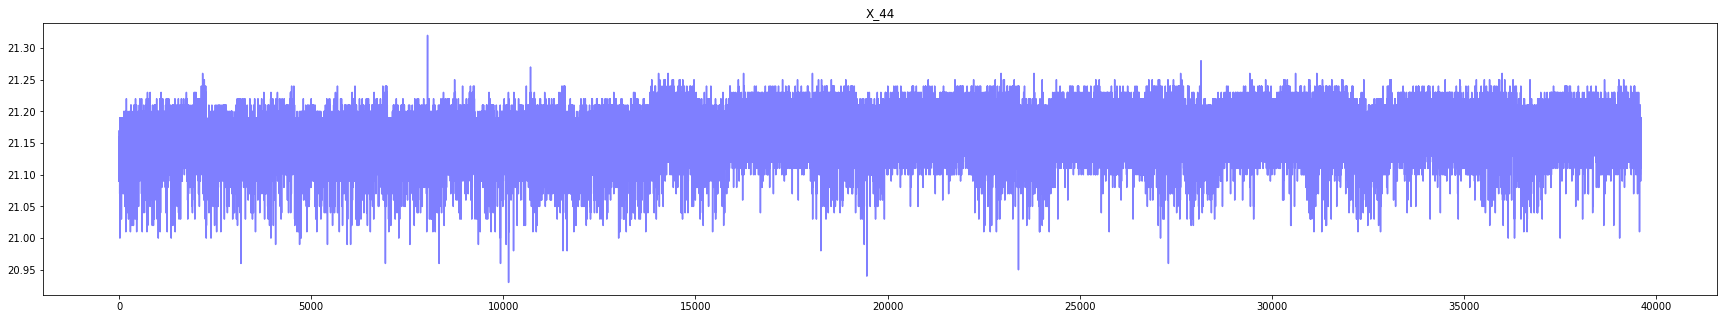

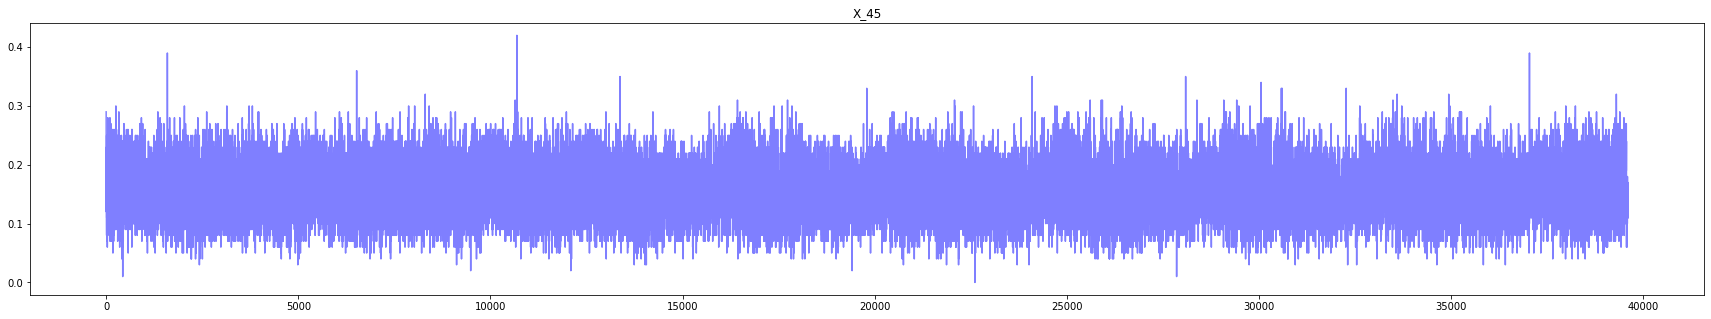

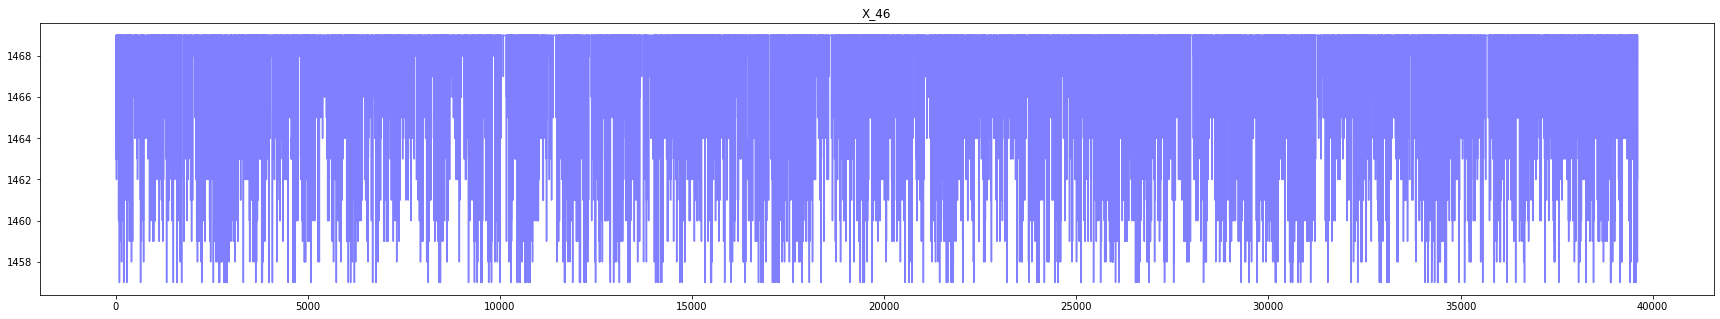

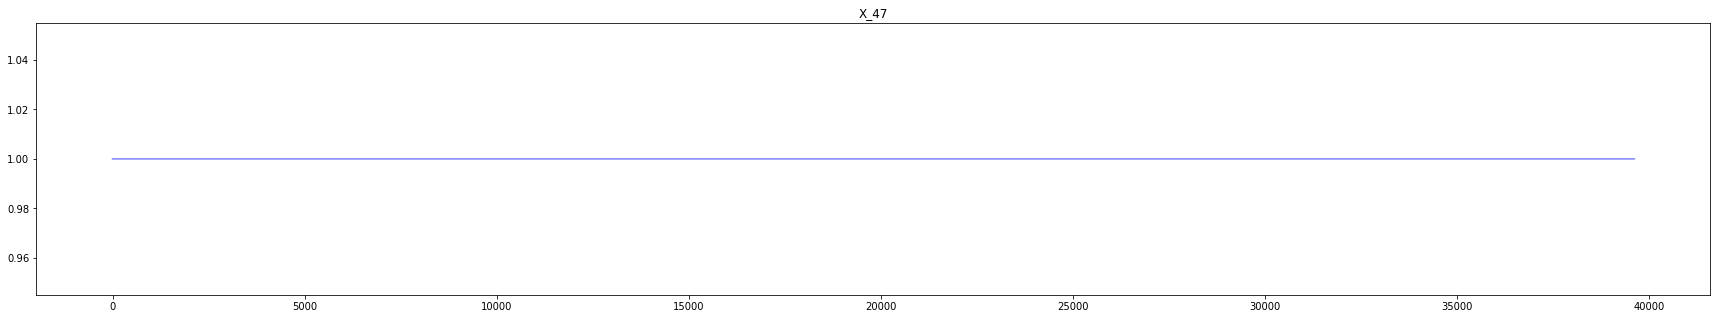

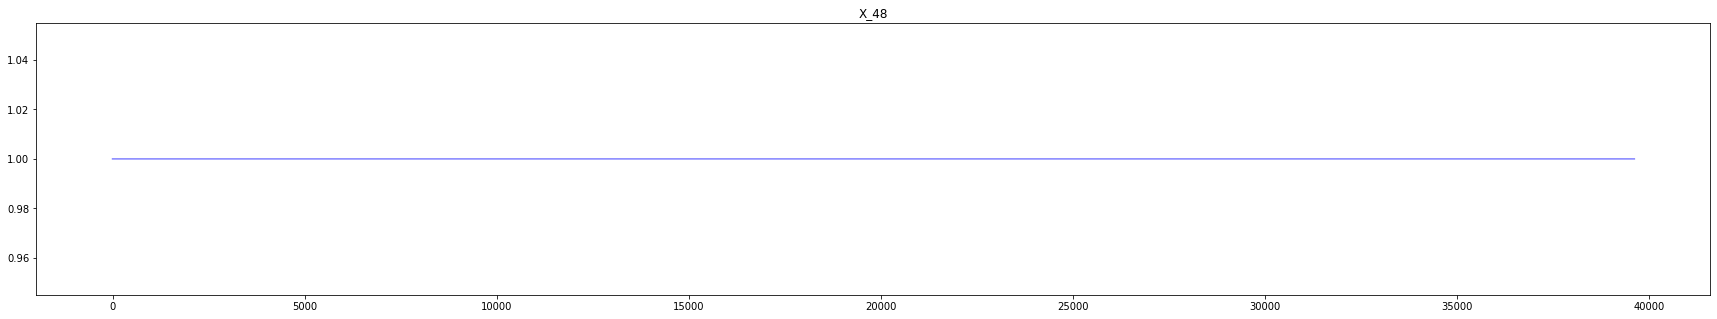

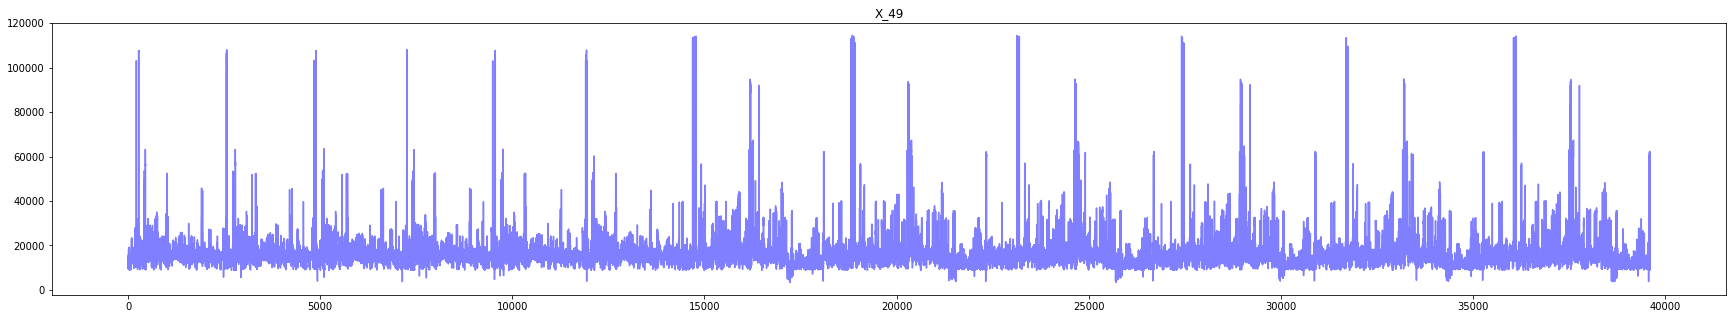

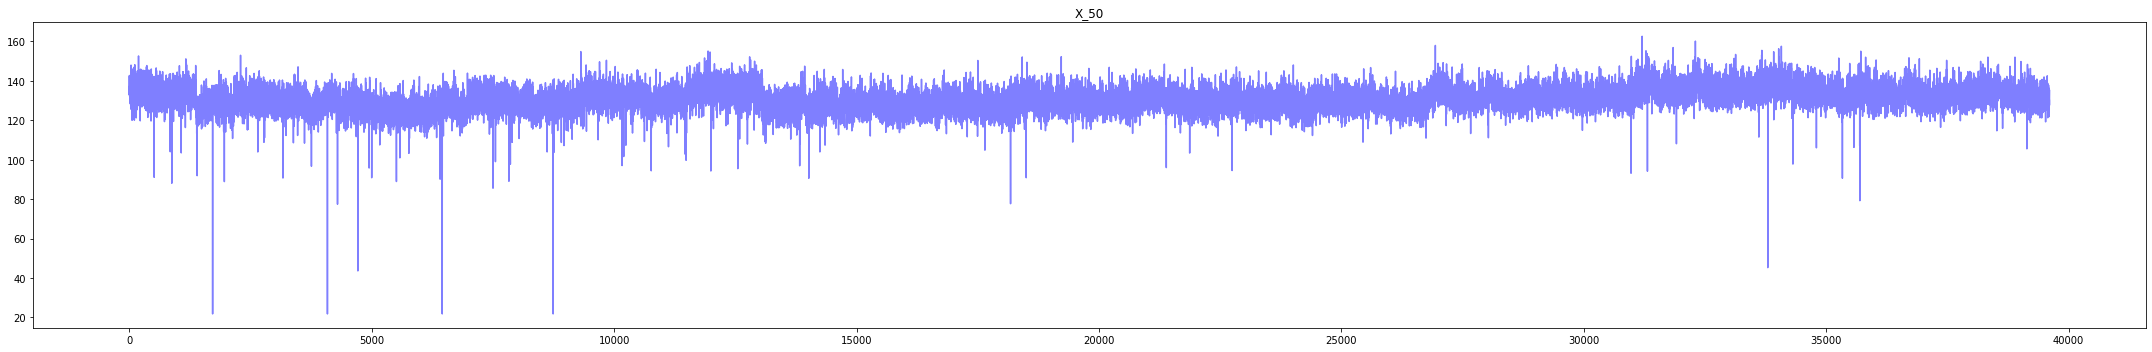

In [ ]:
for i in range(len(num_list)):
  plt.figure(figsize=(30,5))
  plt.title(num_list[i])
  plt.plot(train[num_list[i]],color='blue',alpha=0.5)

#plt.show()
plt.tight_layout()

In [164]:
from scipy.stats import randint as sp_randint
#from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

In [128]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline
sns.set_style('darkgrid')
init_notebook_mode(connected=True)
cf.go_offline()

In [166]:
from catboost import CatBoostRegressor

In [167]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [168]:
feat = []
for f in range(10,57):
  feat.append(f'X_{f}')


In [169]:
num = ('X_01','X_02','X_03','X_04','X_05','X_06','X_07','X_08','X_09')  
for i in range(len(num)):
  feat.append(num[i])

In [170]:
feat2 = []
for f in range(10,15):
  feat2.append(f'Y_{f}')

In [12]:
train.columns

Index(['ID', 'X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08',
       'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17',
       'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26',
       'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35',
       'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44',
       'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53',
       'X_54', 'X_55', 'X_56', 'Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06',
       'Y_07', 'Y_08', 'Y_09', 'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14'],
      dtype='object')

In [171]:
num2 = ('Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06',
       'Y_07', 'Y_08', 'Y_09')
for i in range(len(num2)):
  feat2.append(num2[i])

In [172]:
drop_feat= ['ID','X_10','X_11','X_23','X_47','X_48']
drop_feat2 = ['X_10','X_11','X_23','X_47','X_48']

In [17]:
cor = train[feat].drop(columns=drop_feat2,axis=1).corr()

In [22]:
cor.append(train[feat2].corr())

,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,...,Y_14,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09
X_12,1.000000,-0.131639,-0.084610,-0.171950,-0.113863,-0.281221,-0.293478,-0.003941,0.222084,0.053107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_13,-0.131639,1.000000,-0.639346,-0.477647,0.017181,0.297105,-0.294461,-0.047076,-0.097694,-0.154735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_14,-0.084610,-0.639346,1.000000,0.846266,0.615909,0.506614,0.860102,-0.099899,0.046627,-0.005599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_15,-0.171950,-0.477647,0.846266,1.000000,0.493607,0.602060,0.858704,0.069880,0.174528,0.174642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_16,-0.113863,0.017181,0.615909,0.493607,1.000000,0.736319,0.744759,-0.131983,-0.127970,-0.157348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y_05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.538818,0.224573,0.165991,0.098251,0.705194,1.000000,0.198836,-0.601760,0.536580,0.532131
Y_06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.414623,0.301886,0.253647,0.190563,0.256564,0.198836,1.000000,-0.045800,0.415276,0.413373
Y_07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.400789,-0.142804,-0.167178,-0.034255,-0.558652,-0.601760,-0.045800,1.000000,-0.401405,-0.398200
Y_08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.967331,0.253041,0.260813,0.095567,0.541625,0.536580,0.415276,-0.401405,1.000000,0.966614


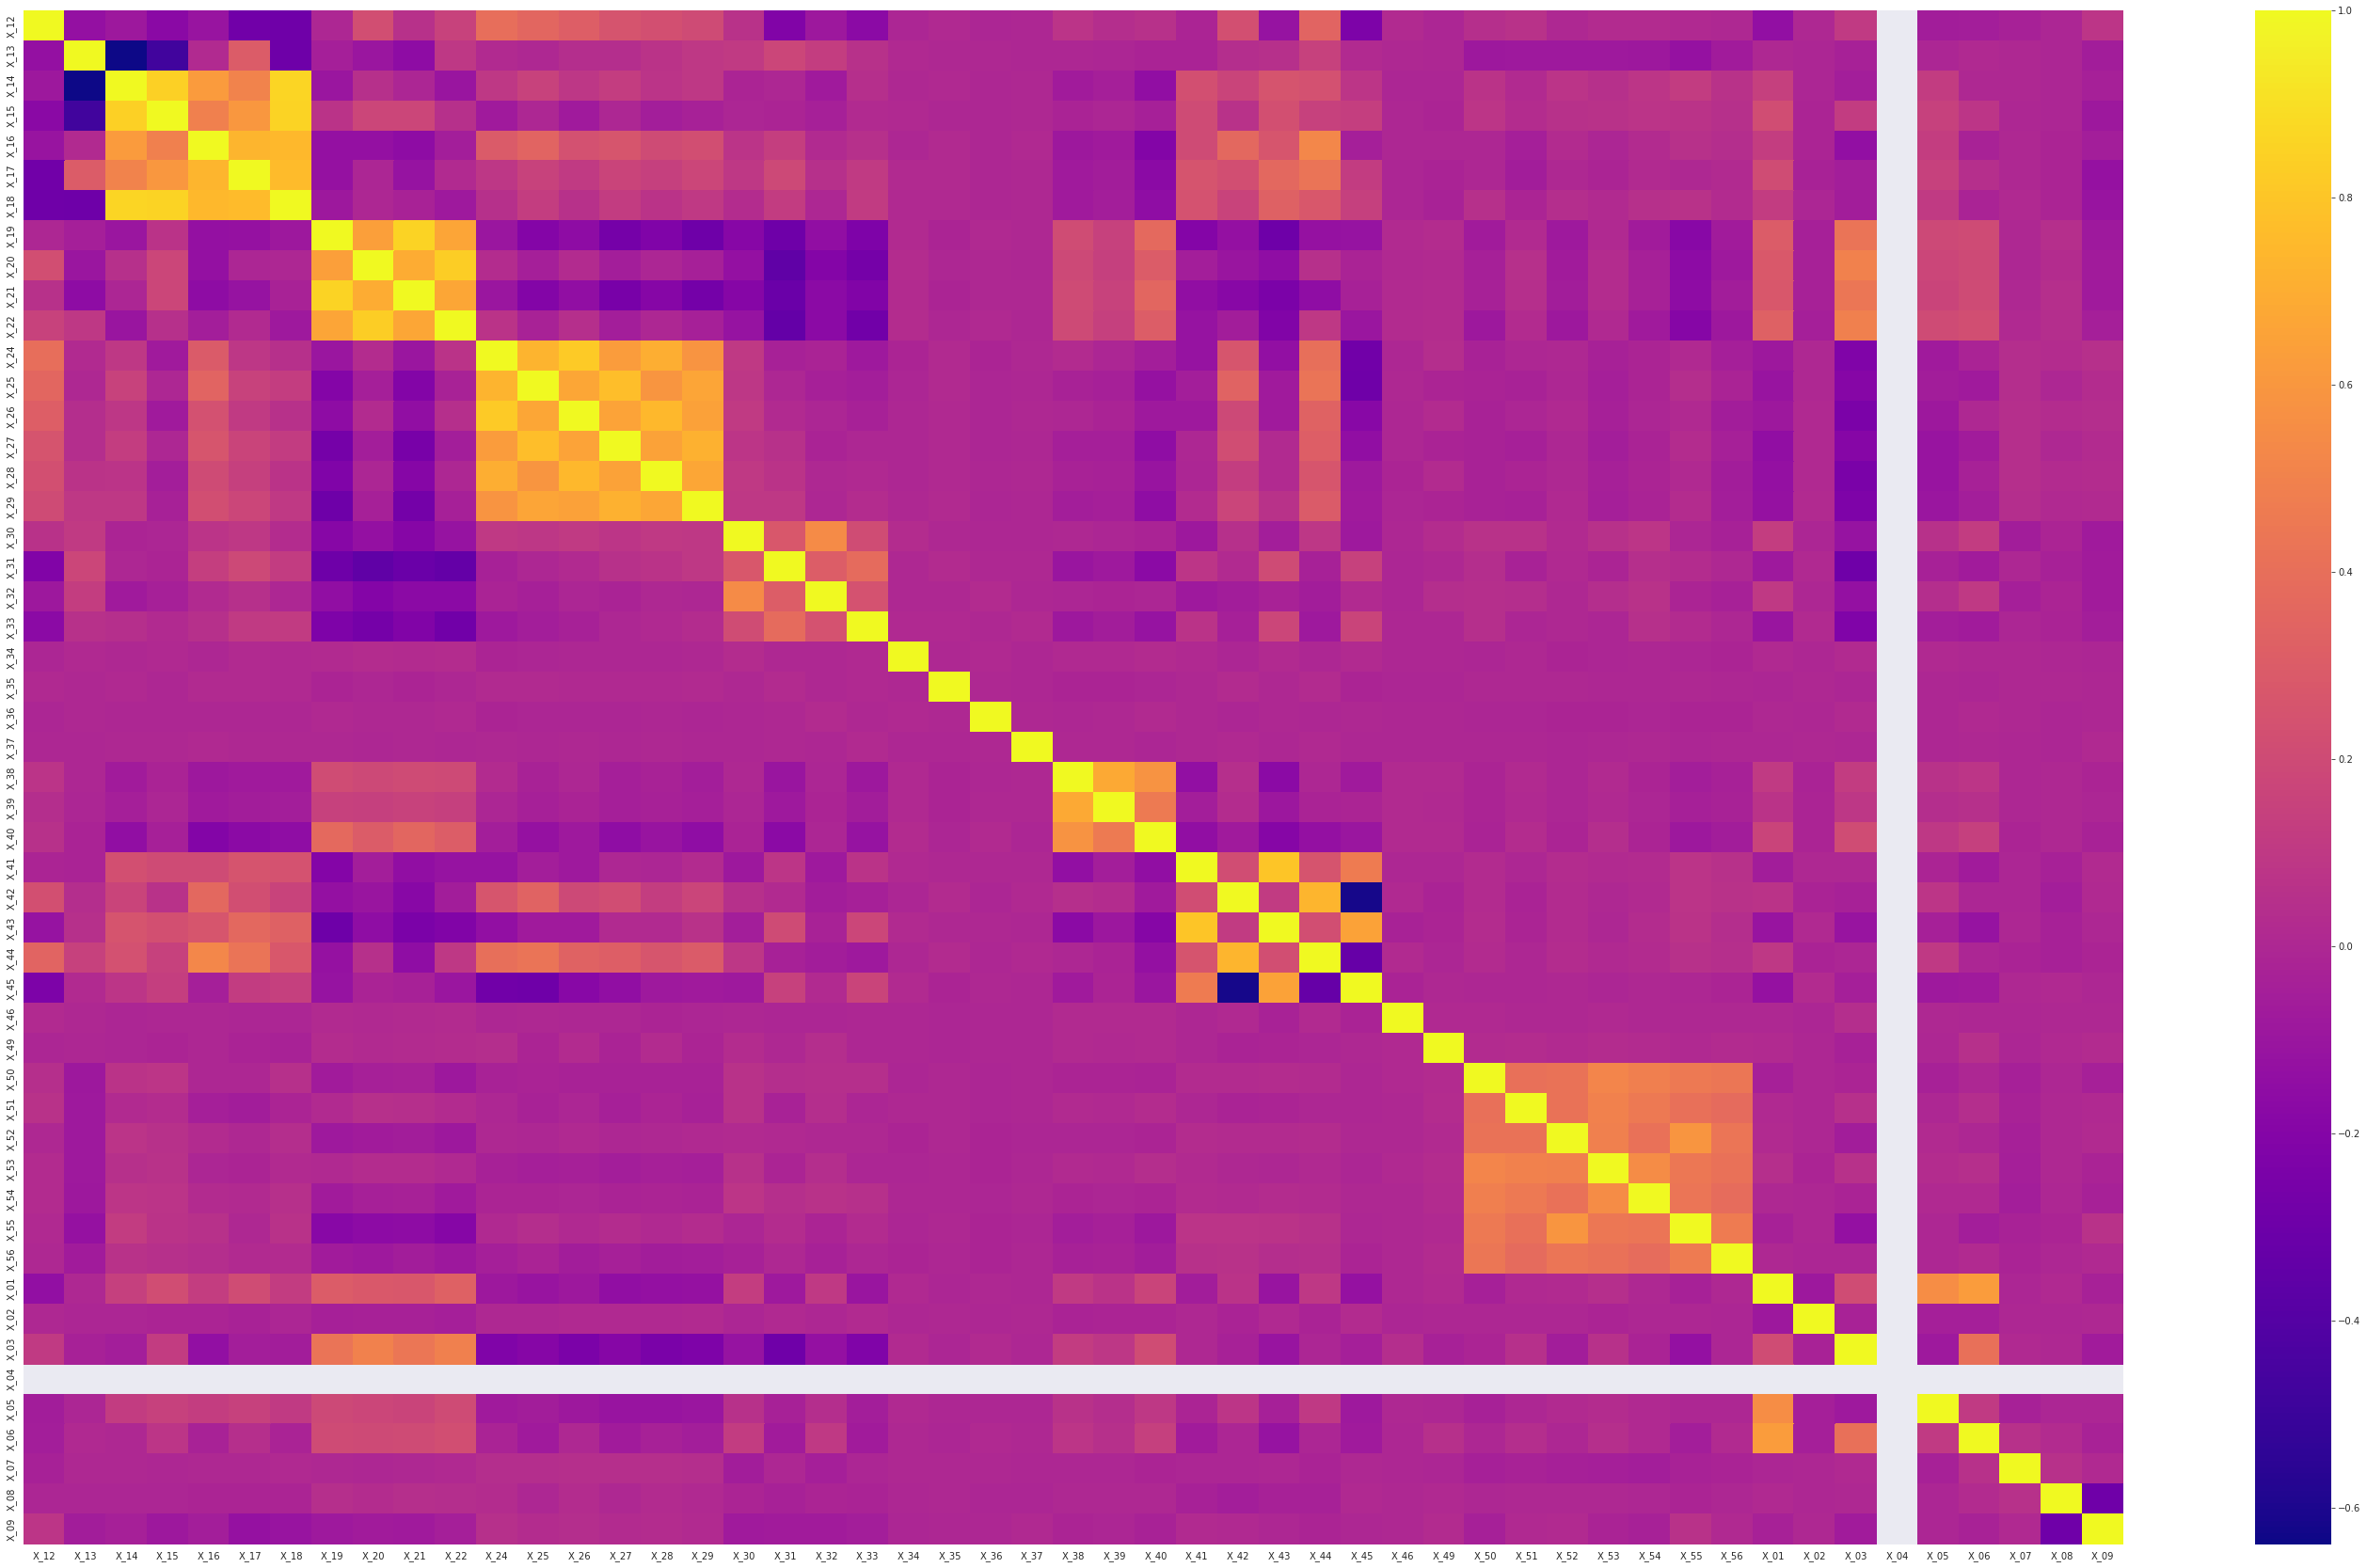

In [25]:
plt.figure(figsize=(50,30))
sns.heatmap(cor, cmap='plasma')

In [26]:
#그래프로 살펴본 후 필요없는 주성분 임의 제거
train.drop(columns=drop_feat,axis=1,inplace=True)

In [80]:
train2 = train

In [81]:
train2.drop(columns=feat2,inplace=True)

In [82]:
train2.drop(columns='ID',inplace=True,axis=1)

In [83]:
train2.head()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762


In [84]:
#PCA 예제 1)
#분산 = 정보량 분산이 크게
# 분산량 왜곡을 방지하기 위해 표준화를 진행
scaler = MinMaxScaler()
data_scale = pd.DataFrame(scaler.fit_transform(train2),columns=train2.columns,index=train2.index)

In [85]:
#주성분 분석. 분산량 확인
pca = PCA(random_state=1107)
X_p = pca.fit_transform(data_scale)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.208475
1     0.378307
2     0.465973
3     0.525763
4     0.576203
5     0.622911
6     0.668514
7     0.711821
8     0.753590
9     0.792455
10    0.818165
11    0.841365
12    0.860367
13    0.877411
14    0.892842
15    0.906509
16    0.916439
17    0.924962
18    0.932607
19    0.939973
20    0.947126
21    0.953812
22    0.959199
23    0.963985
24    0.968285
25    0.971374
26    0.974335
27    0.976901
28    0.979317
29    0.981670
30    0.983836
31    0.985851
32    0.987797
33    0.989336
34    0.990620
35    0.991787
36    0.992894
37    0.993848
38    0.994790
39    0.995683
40    0.996522
41    0.997306
42    0.997936
43    0.998430
44    0.998851
45    0.999179
46    0.999400
47    0.999611
48    0.999773
49    0.999873
50    0.999946
51    1.000000
52    1.000000
53    1.000000
54    1.000000
55    1.000000
dtype: float64

In [39]:
import matplotlib as mpl

In [40]:
#시각화 전 그래프 설정
# minus font 
mpl.rcParams['axes.unicode_minus'] = False

# customize matplitlib
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

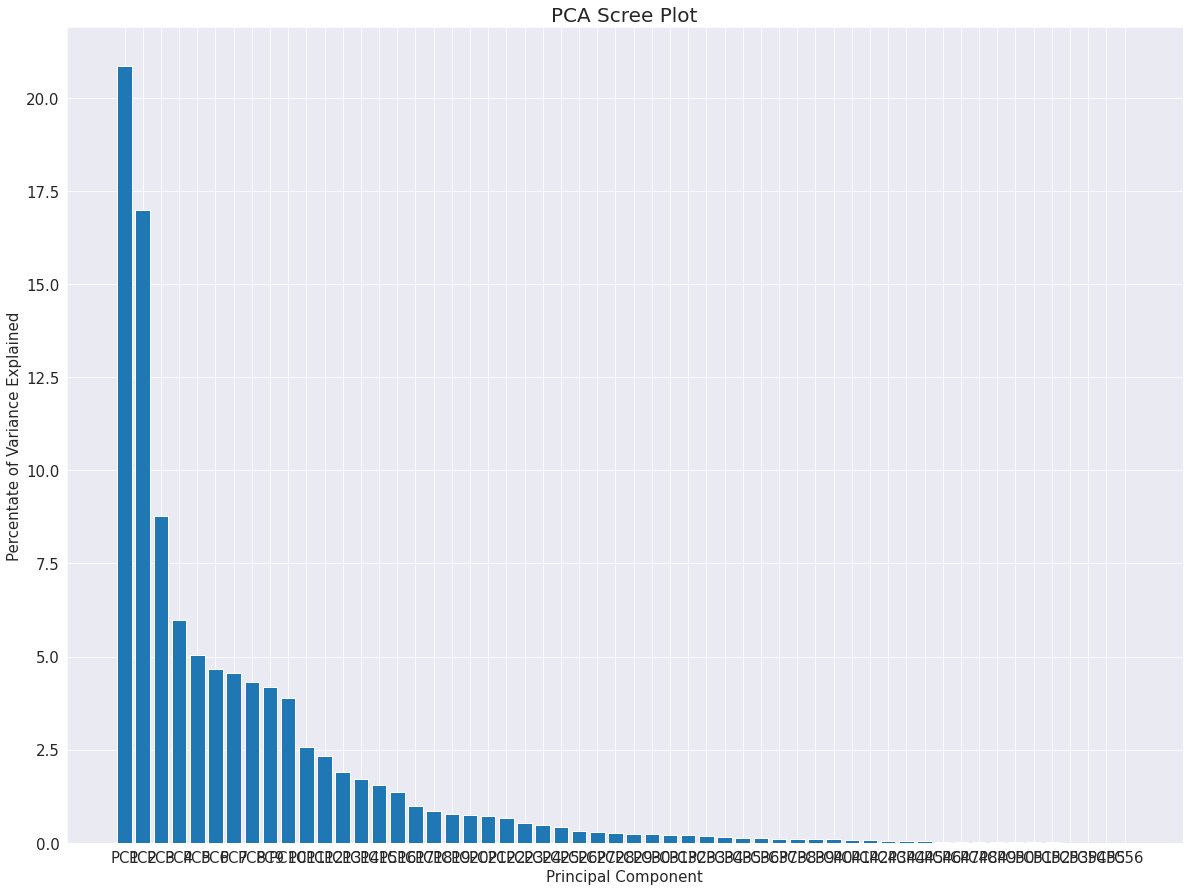

In [71]:
#시각화
percent_variance = np.round(pca.explained_variance_ratio_*100,decimals=2)
columns = []
for i in range(len(percent_variance)):
  columns.append(f'PC{i+1}')
  
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [90]:
X_pp['PC1']

0       -0.311292
1       -0.592496
2        0.536326
3       -0.252963
4       -0.287067
           ...   
39602    0.540054
39603   -0.523262
39604    0.562539
39605   -0.192780
39606   -0.224856
Name: PC1, Length: 39607, dtype: float64

In [72]:
#3개의 주성분으로 각각의 정류소가 어떻게 표현되는지 그래프로 표현
X_pp = pd.DataFrame(X_p[:,:3], columns = ['PC1','PC2','PC3'], index = train2.index)
X_pp

,PC1,PC2,PC3
0,-0.311292,-0.252444,0.118890
1,-0.592496,0.710784,0.311965
2,0.536326,0.001403,0.275038
3,-0.252963,-0.240273,-0.086697
4,-0.287067,-0.241766,0.204809
...,...,...,...
39602,0.540054,0.004409,0.414981
39603,-0.523262,0.736596,0.255163
39604,0.562539,0.009193,0.280168
39605,-0.192780,-0.219595,0.035950


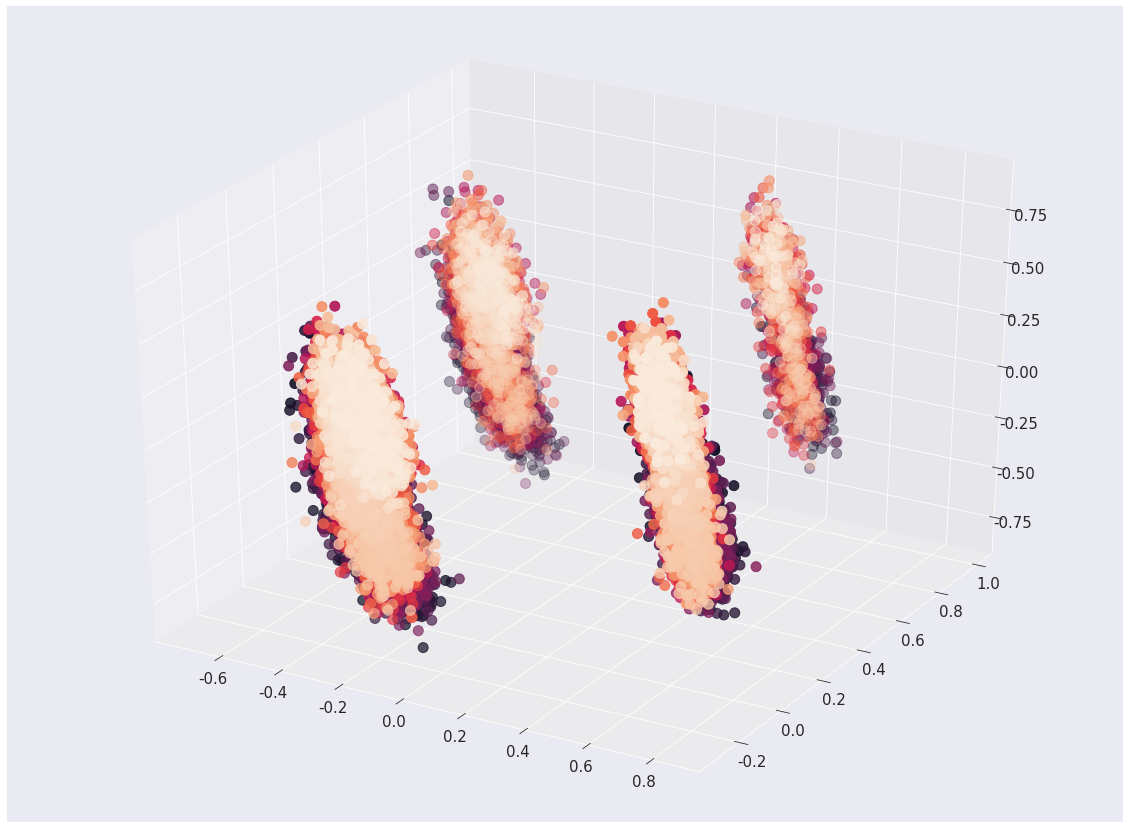

In [91]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_pp['PC1'],X_pp['PC2'],X_pp['PC3'], s=100, c = train2.index)
plt.show()

AttributeError: ignored

In [240]:
#PCA예제2)
train = pd.read_csv('/content/train.csv')

In [241]:
#분산이 큰 변수들 따로 추출
categorical = ['X_34','X_35','X_36','X_37','X_40','X_44','X_45']

In [145]:
train[categorical] = train[categorical].astype('category')

In [190]:
for cat in categorical:
    print(cat,train[cat].dropna().unique())

X_34 [12.99 12.92 12.97 12.91 12.96 12.95 13.01 12.98 13.   12.94 12.89 12.87
 12.93 12.88 13.02 13.04 12.86 13.03 12.9  12.85 13.06 13.05 12.84 13.07
 13.08]
X_35 [12.88 12.87 12.97 12.85 12.91 12.89 12.86 13.   12.98 12.95 12.96 12.93
 13.02 12.99 12.92 12.9  12.83 12.94 13.03 12.82 12.84 13.01 13.05 13.04
 12.81 13.09 13.06 13.07]
X_36 [12.89 12.87 12.99 12.91 13.01 12.94 12.86 13.   12.9  12.96 12.97 12.98
 12.88 12.92 12.93 12.95 13.03 12.85 13.02 12.84 13.04 13.06 13.07 13.05
 13.08 13.09]
X_37 [12.99 12.93 13.   12.92 12.96 12.86 12.88 12.97 12.95 12.9  12.98 12.91
 12.85 12.83 12.94 13.01 12.84 12.87 12.89 13.02 13.03 12.82 13.04 12.81
 13.05 13.07 13.06 13.08]
X_40 [-17.03 -16.74 -16.76 -16.67 -16.85 -17.14 -16.23 -16.68 -16.54 -16.63
 -16.72 -16.84 -16.38 -16.59 -16.53 -16.31 -16.28 -16.42 -15.77 -16.92
 -16.83 -16.65 -16.94 -16.75 -16.64 -16.3  -16.77 -16.97 -16.99 -16.87
 -16.69 -16.79 -16.73 -16.41 -16.71 -16.7  -16.86 -17.02 -16.37 -16.81
 -16.9  -16.88 -15.79 -16.14 -16.

In [211]:
train.drop(columns=drop_feat,axis=1,inplace=True)

In [114]:
#train.drop(columns=feat2,axis=1,inplace=True)

In [242]:
#PCA예제2)
# IterativeImputer는 결측치가 있는 피처를 다른 피처의 함수로 모델링함으로써 추정함

iter_cat = IterativeImputer(initial_strategy='constant', verbose=3)

In [243]:
train[categorical]= iter_cat.fit_transform(train[categorical])

[IterativeImputer] Completing matrix with shape (39607, 7)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.24
[IterativeImputer] Change: 0.0, scaled tolerance: 0.021320000000000002 
[IterativeImputer] Early stopping criterion reached.


In [244]:
train[cat_int] = train[cat_int].astype('int64')

In [245]:
iter_num = IterativeImputer(initial_strategy='median', verbose=3)

In [246]:
train[numerical] = iter_num.fit_transform(train[numerical])

[IterativeImputer] Completing matrix with shape (39607, 44)
[IterativeImputer] Ending imputation round 1/10, elapsed time 9.98
[IterativeImputer] Change: 0.0, scaled tolerance: 114.56363 
[IterativeImputer] Early stopping criterion reached.


In [247]:
train.drop(columns=drop_feat, axis=1, inplace=True)

In [249]:
mms = MinMaxScaler()
train[numerical] = mms.fit_transform(train[numerical])

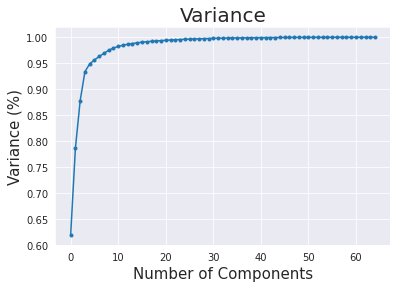

In [250]:
pca = PCA()
pca.fit(train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='.')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance')
plt.show()

In [191]:
cat_int=['X_40']

In [208]:
numerical = ['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09',
      'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18',
       'X_19', 'X_20', 'X_21', 'X_22', 'X_24', 'X_25', 'X_26', 'X_27',
       'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33',
        'X_38', 'X_39', 'X_41', 'X_42', 'X_43',
       'X_46', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54',
       'X_55', 'X_56']

In [251]:
pca = PCA(n_components=10)
df=pca.fit_transform(train[numerical])

In [252]:
df = pd.DataFrame(df)

In [253]:
df

,0,1,2,3,4,5,6,7,8,9
0,-0.292073,-0.251682,-0.139783,-0.121608,0.023785,0.439918,0.254889,-0.137519,-0.005875,0.152250
1,-0.590288,0.710313,-0.333502,-0.104226,0.235251,0.428208,0.235628,-0.180390,0.024165,0.077427
2,0.543037,0.002485,-0.308956,-0.363965,0.137849,0.014834,0.052359,-0.191607,0.038835,0.144950
3,-0.239668,-0.239637,0.038921,-0.568512,0.038467,-0.069986,0.371302,-0.150535,-0.014597,0.263761
4,-0.274852,-0.240850,-0.247697,-0.254092,0.178424,-0.060655,0.060454,-0.011952,0.014150,0.183876
...,...,...,...,...,...,...,...,...,...,...
39602,0.542972,0.004653,-0.394907,-0.198494,0.007445,-0.078235,-0.020326,0.051614,-0.134567,-0.029066
39603,-0.529497,0.735082,-0.271298,-0.180184,0.067213,0.836778,-0.139713,-0.021990,-0.044972,-0.037478
39604,0.563231,0.010582,-0.269540,-0.206199,-0.072901,0.760127,-0.034116,-0.011891,0.044730,-0.088048
39605,-0.184986,-0.218551,-0.040009,-0.381340,-0.193108,-0.075993,0.042322,0.157451,-0.136416,0.120882


In [254]:
for col in categorical:
    df[col] = train[col].apply(lambda x: "{0:.4f}".format(x))

In [255]:
df[categorical] = df[categorical].astype('category')

In [256]:
df[feat2]=train[feat2]

In [257]:
df.columns

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9, 'X_34', 'X_35', 'X_36', 'X_37', 'X_40', 'X_44', 'X_45', 'Y_10',
       'Y_11', 'Y_12', 'Y_13', 'Y_14', 'Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05',
       'Y_06', 'Y_07', 'Y_08', 'Y_09'],
      dtype='object')

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       39607 non-null  float64 
 1   1       39607 non-null  float64 
 2   2       39607 non-null  float64 
 3   3       39607 non-null  float64 
 4   4       39607 non-null  float64 
 5   5       39607 non-null  float64 
 6   6       39607 non-null  float64 
 7   7       39607 non-null  float64 
 8   8       39607 non-null  float64 
 9   9       39607 non-null  float64 
 10  X_34    39607 non-null  category
 11  X_35    39607 non-null  category
 12  X_36    39607 non-null  category
 13  X_37    39607 non-null  category
 14  X_40    39607 non-null  category
 15  X_44    39607 non-null  category
 16  X_45    39607 non-null  category
 17  Y_10    39607 non-null  float64 
 18  Y_11    39607 non-null  float64 
 19  Y_12    39607 non-null  float64 
 20  Y_13    39607 non-null  float64 
 21  Y_14    3960

In [280]:
cat_enc = pd.get_dummies(df[categorical], drop_first=True)

In [281]:
pca_df = df.iloc[:,:10]
enc_train = pca_df.join(cat_enc)
enc_train[feat2] = train[feat2]

In [282]:
enc_train.shape

(39607, 203)

In [262]:
targets = feat2

In [279]:
feat2

['Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_01',
 'Y_02',
 'Y_03',
 'Y_04',
 'Y_05',
 'Y_06',
 'Y_07',
 'Y_08',
 'Y_09']

In [160]:
enc_train.head()

,0,1,2,3,X_34,X_35,X_36,X_37,X_40,X_44,...,Y_14,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09
0,-6970.455164,-101.794399,11.742754,-8.137446,12.9900,12.8800,12.8900,12.9900,-17.0000,21.0900,...,-25.304,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529
1,-6253.458033,-101.808645,-0.371741,-6.913426,12.9200,12.8700,12.8900,12.9300,-16.0000,21.1300,...,-26.438,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523
2,-5728.439119,-61.885882,42.526978,-3.728739,12.9700,12.8700,12.8700,13.0000,-16.0000,21.1200,...,-26.370,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216
3,-1669.439864,-51.240069,25.649851,-11.283320,12.9100,12.9700,12.9900,12.9200,-16.0000,21.0900,...,-25.345,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079
4,-5625.445689,-60.915603,11.399231,-5.478627,12.9600,12.8500,12.9100,12.9600,-16.0000,21.1000,...,-24.974,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242


In [283]:
X,X1,y,y1 = train_test_split(enc_train.drop(columns=targets, axis=1), enc_train[targets], test_size=0.1, random_state=101)

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [285]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=8, verbose=3)
mor2 = MultiOutputRegressor(rfr)

In [266]:
mor2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   22.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.7s finished


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=8, verbose=3))

In [267]:
pickle.dump(mor2,open('mor_rfr.sav', 'wb'))

In [286]:
mlp = MLPRegressor(batch_size=256, max_iter=300, learning_rate='adaptive',verbose=True, early_stopping=True)
mor1 = MultiOutputRegressor(mlp)

In [287]:
mor1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 169.73983184
Validation score: -186.263667
Iteration 2, loss = 23.35527241
Validation score: -1.296541
Iteration 3, loss = 0.57430569
Validation score: -0.237286
Iteration 4, loss = 0.49432853
Validation score: -0.153701
Iteration 5, loss = 0.46509160
Validation score: -0.099421
Iteration 6, loss = 0.44674599
Validation score: -0.066610
Iteration 7, loss = 0.43597901
Validation score: -0.048055
Iteration 8, loss = 0.42978498
Validation score: -0.038334
Iteration 9, loss = 0.42633560
Validation score: -0.031718
Iteration 10, loss = 0.42414842
Validation score: -0.028280
Iteration 11, loss = 0.42307156
Validation score: -0.026415
Iteration 12, loss = 0.42207387
Validation score: -0.024628
Iteration 13, loss = 0.42170084
Validation score: -0.024088
Iteration 14, loss = 0.42132058
Validation score: -0.023182
Iteration 15, loss = 0.42089800
Validation score: -0.022197
Iteration 16, loss = 0.42061529
Validation score: -0.020268
Iteration 17, loss = 0.42049540
Validation s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 210.20801757
Validation score: -278.933839
Iteration 2, loss = 30.50210255
Validation score: -1.927891
Iteration 3, loss = 0.54965138
Validation score: -0.375632
Iteration 4, loss = 0.44978079
Validation score: -0.238655
Iteration 5, loss = 0.41195135
Validation score: -0.151529
Iteration 6, loss = 0.38923528
Validation score: -0.101338
Iteration 7, loss = 0.37639379
Validation score: -0.074459
Iteration 8, loss = 0.36918384
Validation score: -0.059160
Iteration 9, loss = 0.36505944
Validation score: -0.050437
Iteration 10, loss = 0.36270877
Validation score: -0.045262
Iteration 11, loss = 0.36104946
Validation score: -0.040115
Iteration 12, loss = 0.36001769
Validation score: -0.036196
Iteration 13, loss = 0.35917436
Validation score: -0.035895
Iteration 14, loss = 0.35871336
Validation score: -0.034647
Iteration 15, loss = 0.35803707
Validation score: -0.032074
Iteration 16, loss = 0.35770297
Validation score: -0.033691
Iteration 17, loss = 0.35733066
Validation s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 255.23859376
Validation score: -597.421968
Iteration 2, loss = 43.78590691
Validation score: -10.310289
Iteration 3, loss = 0.63980070
Validation score: -0.661090
Iteration 4, loss = 0.33189153
Validation score: -0.451575
Iteration 5, loss = 0.29457489
Validation score: -0.310436
Iteration 6, loss = 0.26984616
Validation score: -0.216990
Iteration 7, loss = 0.25421899
Validation score: -0.158637
Iteration 8, loss = 0.24457119
Validation score: -0.122835
Iteration 9, loss = 0.23885149
Validation score: -0.099147
Iteration 10, loss = 0.23522504
Validation score: -0.086405
Iteration 11, loss = 0.23302127
Validation score: -0.076846
Iteration 12, loss = 0.23135260
Validation score: -0.070363
Iteration 13, loss = 0.23020770
Validation score: -0.065262
Iteration 14, loss = 0.22944069
Validation score: -0.062279
Iteration 15, loss = 0.22892152
Validation score: -0.058511
Iteration 16, loss = 0.22842227
Validation score: -0.057834
Iteration 17, loss = 0.22796338
Validation 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 247.71368587
Validation score: -569.002376
Iteration 2, loss = 40.75710666
Validation score: -5.176981
Iteration 3, loss = 0.46304147
Validation score: -0.579137
Iteration 4, loss = 0.31914012
Validation score: -0.375732
Iteration 5, loss = 0.28008843
Validation score: -0.252630
Iteration 6, loss = 0.25640550
Validation score: -0.185129
Iteration 7, loss = 0.24295273
Validation score: -0.150901
Iteration 8, loss = 0.23560792
Validation score: -0.135584
Iteration 9, loss = 0.23146204
Validation score: -0.127139
Iteration 10, loss = 0.22917064
Validation score: -0.122134
Iteration 11, loss = 0.22759419
Validation score: -0.119945
Iteration 12, loss = 0.22658596
Validation score: -0.117506
Iteration 13, loss = 0.22589696
Validation score: -0.113285
Iteration 14, loss = 0.22528284
Validation score: -0.113513
Iteration 15, loss = 0.22498561
Validation score: -0.110794
Iteration 16, loss = 0.22451423
Validation score: -0.109674
Iteration 17, loss = 0.22427815
Validation s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 251.74586492
Validation score: -617.050802
Iteration 2, loss = 42.37187457
Validation score: -7.587602
Iteration 3, loss = 0.55194050
Validation score: -0.658177
Iteration 4, loss = 0.33993329
Validation score: -0.428599
Iteration 5, loss = 0.29836512
Validation score: -0.276813
Iteration 6, loss = 0.27161509
Validation score: -0.182618
Iteration 7, loss = 0.25528165
Validation score: -0.127274
Iteration 8, loss = 0.24566246
Validation score: -0.095346
Iteration 9, loss = 0.24010072
Validation score: -0.077728
Iteration 10, loss = 0.23683365
Validation score: -0.066422
Iteration 11, loss = 0.23472210
Validation score: -0.060725
Iteration 12, loss = 0.23323587
Validation score: -0.056912
Iteration 13, loss = 0.23226329
Validation score: -0.053436
Iteration 14, loss = 0.23145562
Validation score: -0.051199
Iteration 15, loss = 0.23087755
Validation score: -0.051947
Iteration 16, loss = 0.23057794
Validation score: -0.049821
Iteration 17, loss = 0.23017274
Validation s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.18337736
Validation score: -0.045148
Iteration 2, loss = 0.06562107
Validation score: -0.025568
Iteration 3, loss = 0.06461378
Validation score: -0.022599
Iteration 4, loss = 0.06380919
Validation score: -0.026845
Iteration 5, loss = 0.06319453
Validation score: -0.030568
Iteration 6, loss = 0.06253803
Validation score: -0.025434
Iteration 7, loss = 0.06191525
Validation score: -0.028058
Iteration 8, loss = 0.06135661
Validation score: -0.024819
Iteration 9, loss = 0.06060823
Validation score: -0.025566
Iteration 10, loss = 0.05992951
Validation score: -0.029198
Iteration 11, loss = 0.05917893
Validation score: -0.042794
Iteration 12, loss = 0.05854257
Validation score: -0.032475
Iteration 13, loss = 0.05764518
Validation score: -0.037553
Iteration 14, loss = 0.05685600
Validation score: -0.048191
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.14323280
Validation score: -0.031927
Iteration 2, loss = 0.07575033
Validation score: -0.014708
Iteration 3, loss = 0.07457391
Validation score: -0.008274
Iteration 4, loss = 0.07368986
Validation score: -0.009154
Iteration 5, loss = 0.07287709
Validation score: -0.011344
Iteration 6, loss = 0.07203482
Validation score: -0.008464
Iteration 7, loss = 0.07124023
Validation score: -0.007549
Iteration 8, loss = 0.07025573
Validation score: -0.012276
Iteration 9, loss = 0.06940474
Validation score: -0.018480
Iteration 10, loss = 0.06853549
Validation score: -0.018306
Iteration 11, loss = 0.06763252
Validation score: -0.022455
Iteration 12, loss = 0.06640435
Validation score: -0.027544
Iteration 13, loss = 0.06546188
Validation score: -0.044832
Iteration 14, loss = 0.06443089
Validation score: -0.038110
Iteration 15, loss = 0.06314784
Validation score: -0.043706
Iteration 16, loss = 0.06215071
Validation score: -0.058240
Iteration 17, loss = 0.06118228
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.10474782
Validation score: -0.044347
Iteration 2, loss = 0.06726838
Validation score: -0.035243
Iteration 3, loss = 0.06602500
Validation score: -0.031911
Iteration 4, loss = 0.06494933
Validation score: -0.033150
Iteration 5, loss = 0.06398667
Validation score: -0.036229
Iteration 6, loss = 0.06299319
Validation score: -0.037407
Iteration 7, loss = 0.06214255
Validation score: -0.040823
Iteration 8, loss = 0.06120475
Validation score: -0.043412
Iteration 9, loss = 0.06017778
Validation score: -0.051342
Iteration 10, loss = 0.05900168
Validation score: -0.051406
Iteration 11, loss = 0.05788748
Validation score: -0.058899
Iteration 12, loss = 0.05673050
Validation score: -0.076807
Iteration 13, loss = 0.05581281
Validation score: -0.079175
Iteration 14, loss = 0.05473681
Validation score: -0.094508
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 58.35980902
Validation score: -2.376459
Iteration 2, loss = 5.49533381
Validation score: -0.017824
Iteration 3, loss = 3.52215782
Validation score: -0.010000
Iteration 4, loss = 3.49335229
Validation score: -0.007169
Iteration 5, loss = 3.47973911
Validation score: -0.005872
Iteration 6, loss = 3.47177063
Validation score: -0.004573
Iteration 7, loss = 3.46876748
Validation score: -0.005068
Iteration 8, loss = 3.46723561
Validation score: -0.003989
Iteration 9, loss = 3.46514420
Validation score: -0.004319
Iteration 10, loss = 3.46508808
Validation score: -0.003791
Iteration 11, loss = 3.46431958
Validation score: -0.003963
Iteration 12, loss = 3.46379160
Validation score: -0.003687
Iteration 13, loss = 3.46287483
Validation score: -0.003376
Iteration 14, loss = 3.46212511
Validation score: -0.003915
Iteration 15, loss = 3.46217922
Validation score: -0.003359
Iteration 16, loss = 3.45910644
Validation score: -0.004041
Iteration 17, loss = 3.45811661
Validation score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 379.50995172
Validation score: -64.644286
Iteration 2, loss = 85.13216591
Validation score: -2.073969
Iteration 3, loss = 4.45093783
Validation score: -0.053459
Iteration 4, loss = 3.36770131
Validation score: -0.040104
Iteration 5, loss = 3.32080222
Validation score: -0.030182
Iteration 6, loss = 3.28806353
Validation score: -0.024936
Iteration 7, loss = 3.26648928
Validation score: -0.020634
Iteration 8, loss = 3.25256327
Validation score: -0.018280
Iteration 9, loss = 3.24315516
Validation score: -0.016623
Iteration 10, loss = 3.23708747
Validation score: -0.015834
Iteration 11, loss = 3.23230995
Validation score: -0.016019
Iteration 12, loss = 3.23005960
Validation score: -0.013940
Iteration 13, loss = 3.22765531
Validation score: -0.014224
Iteration 14, loss = 3.22612193
Validation score: -0.014053
Iteration 15, loss = 3.22510913
Validation score: -0.013858
Iteration 16, loss = 3.22472880
Validation score: -0.012735
Iteration 17, loss = 3.22368989
Validation sc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 87.09373302
Validation score: -9.816626
Iteration 2, loss = 6.24721674
Validation score: -0.017240
Iteration 3, loss = 1.77663835
Validation score: -0.007903
Iteration 4, loss = 1.74820775
Validation score: -0.004391
Iteration 5, loss = 1.73384373
Validation score: -0.004007
Iteration 6, loss = 1.72622338
Validation score: -0.004702
Iteration 7, loss = 1.72305292
Validation score: -0.004460
Iteration 8, loss = 1.72108366
Validation score: -0.003741
Iteration 9, loss = 1.71961751
Validation score: -0.005065
Iteration 10, loss = 1.72004999
Validation score: -0.004316
Iteration 11, loss = 1.71828796
Validation score: -0.002916
Iteration 12, loss = 1.71817187
Validation score: -0.003021
Iteration 13, loss = 1.71801900
Validation score: -0.004663
Iteration 14, loss = 1.71824892
Validation score: -0.003145
Iteration 15, loss = 1.71780597
Validation score: -0.002576
Iteration 16, loss = 1.71788018
Validation score: -0.003631
Iteration 17, loss = 1.71784725
Validation score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 1.46399709
Validation score: -0.185090
Iteration 2, loss = 0.09515784
Validation score: -0.022680
Iteration 3, loss = 0.08826061
Validation score: -0.011930
Iteration 4, loss = 0.08749833
Validation score: -0.008238
Iteration 5, loss = 0.08729853
Validation score: -0.007544
Iteration 6, loss = 0.08708964
Validation score: -0.009014
Iteration 7, loss = 0.08686548
Validation score: -0.003025
Iteration 8, loss = 0.08669457
Validation score: -0.009510
Iteration 9, loss = 0.08635783
Validation score: -0.013189
Iteration 10, loss = 0.08621825
Validation score: -0.006941
Iteration 11, loss = 0.08591326
Validation score: -0.013441
Iteration 12, loss = 0.08569371
Validation score: -0.008833
Iteration 13, loss = 0.08527162
Validation score: -0.011136
Iteration 14, loss = 0.08488062
Validation score: -0.017535
Iteration 15, loss = 0.08448248
Validation score: -0.017921
Iteration 16, loss = 0.08421187
Validation score: -0.018205
Iteration 17, loss = 0.08369074
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 259.08650310
Validation score: -603.313108
Iteration 2, loss = 49.07261304
Validation score: -10.824617
Iteration 3, loss = 0.63842362
Validation score: -0.599890
Iteration 4, loss = 0.31898243
Validation score: -0.421107
Iteration 5, loss = 0.28458841
Validation score: -0.302067
Iteration 6, loss = 0.26267105
Validation score: -0.227556
Iteration 7, loss = 0.24965455
Validation score: -0.183097
Iteration 8, loss = 0.24201717
Validation score: -0.156248
Iteration 9, loss = 0.23754530
Validation score: -0.137639
Iteration 10, loss = 0.23480225
Validation score: -0.124745
Iteration 11, loss = 0.23295786
Validation score: -0.115955
Iteration 12, loss = 0.23179391
Validation score: -0.107792
Iteration 13, loss = 0.23079518
Validation score: -0.102735
Iteration 14, loss = 0.23006835
Validation score: -0.098862
Iteration 15, loss = 0.22951677
Validation score: -0.095588
Iteration 16, loss = 0.22919817
Validation score: -0.091262
Iteration 17, loss = 0.22885499
Validation 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 263.26428237
Validation score: -686.217966
Iteration 2, loss = 53.24266762
Validation score: -14.391473
Iteration 3, loss = 0.74169417
Validation score: -0.709326
Iteration 4, loss = 0.33275611
Validation score: -0.449870
Iteration 5, loss = 0.29055167
Validation score: -0.287512
Iteration 6, loss = 0.26455687
Validation score: -0.190552
Iteration 7, loss = 0.24954987
Validation score: -0.135820
Iteration 8, loss = 0.24103639
Validation score: -0.105308
Iteration 9, loss = 0.23633647
Validation score: -0.089470
Iteration 10, loss = 0.23351346
Validation score: -0.078657
Iteration 11, loss = 0.23166937
Validation score: -0.070807
Iteration 12, loss = 0.23044700
Validation score: -0.066817
Iteration 13, loss = 0.22953020
Validation score: -0.063250
Iteration 14, loss = 0.22868039
Validation score: -0.062798
Iteration 15, loss = 0.22819211
Validation score: -0.058429
Iteration 16, loss = 0.22779471
Validation score: -0.057392
Iteration 17, loss = 0.22739010
Validation 

MultiOutputRegressor(estimator=MLPRegressor(batch_size=256, early_stopping=True,
                                            learning_rate='adaptive',
                                            max_iter=300, verbose=True))

In [288]:
pickle.dump(mor1,open('mor_mlp.sav', 'wb'))

In [289]:
mor_mlp = pickle.load(open('mor_mlp.sav', 'rb'))

In [290]:
mor_rfr = pickle.load(open('mor_rfr.sav', 'rb'))

In [291]:
y_pred_mlp = mor_mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names o

In [276]:
y_pred_rfr = mor_rfr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
